In [1]:
!pip install -q fastai

spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# %matplotlib inline
from fastai.basics import *

In [3]:
import numpy as np
import pandas as pd

house_sales = [(3, 170_000.), (2, 115_000.), (1, 75_200.),  (2, 110_000.), (2, 125_000.), (5, 235_000.),
               (2, 99_500.),  (1, 59_250.),  (4, 202_000.), (3, 145_000.)]
house_sales

[(3, 170000.0),
 (2, 115000.0),
 (1, 75200.0),
 (2, 110000.0),
 (2, 125000.0),
 (5, 235000.0),
 (2, 99500.0),
 (1, 59250.0),
 (4, 202000.0),
 (3, 145000.0)]

In [4]:
df = pd.DataFrame(house_sales, columns=['rooms', 'price'])
df

,rooms,price
0,3,170000.0
1,2,115000.0
2,1,75200.0
3,2,110000.0
4,2,125000.0
5,5,235000.0
6,2,99500.0
7,1,59250.0
8,4,202000.0
9,3,145000.0


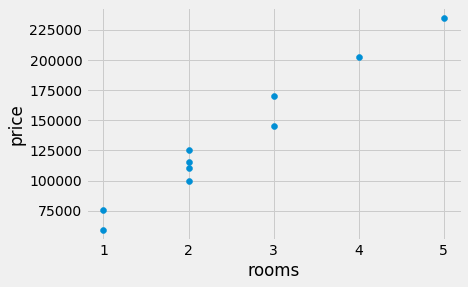

In [5]:
plt.style.use('fivethirtyeight')
plt.xlabel('rooms'); plt.ylabel('price')
plt.scatter(df.rooms, df.price)

In [6]:
print(df.shape)
df.values

(10, 2)


array([[3.000e+00, 1.700e+05],
       [2.000e+00, 1.150e+05],
       [1.000e+00, 7.520e+04],
       [2.000e+00, 1.100e+05],
       [2.000e+00, 1.250e+05],
       [5.000e+00, 2.350e+05],
       [2.000e+00, 9.950e+04],
       [1.000e+00, 5.925e+04],
       [4.000e+00, 2.020e+05],
       [3.000e+00, 1.450e+05]])

In [7]:
x = tensor(df['rooms'].astype(float)); x

tensor([3., 2., 1., 2., 2., 5., 2., 1., 4., 3.])

In [8]:
y = tensor(df['price'].astype(float)); y

tensor([170000., 115000.,  75200., 110000., 125000., 235000.,  99500.,  59250.,
        202000., 145000.])

In [9]:
w = tensor([40_000.] ); w

tensor([40000.])

In [10]:
y_hat = x*w # + torch.rand(100)

In [11]:
df['error'] = (y_hat-y)**2; df 

,rooms,price,error
0,3,170000.0,2.500000e+09
1,2,115000.0,1.225000e+09
2,1,75200.0,1.239040e+09
3,2,110000.0,9.000000e+08
4,2,125000.0,2.025000e+09
5,5,235000.0,1.225000e+09
6,2,99500.0,3.802500e+08
7,1,59250.0,3.705625e+08
8,4,202000.0,1.764000e+09
9,3,145000.0,6.250000e+08


In [12]:
import math
math.sqrt(df.error.mean())

35005.502653154406

In [13]:
(y_hat-y)

tensor([-50000., -35000., -35200., -30000., -45000., -35000., -19500., -19250.,
        -42000., -25000.])

In [14]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [15]:
loss = mse(y_hat, y); loss

tensor(1.2254e+09)

In [16]:
w = nn.Parameter(w); w

Parameter containing:
tensor([40000.], requires_grad=True)

In [17]:
def update():
    y_hat = x*w
    loss = mse(y, y_hat)
    loss.backward()
    with torch.no_grad():
        print(f't {t:2}', f'l {float(loss):10.2f} g {float(w.grad):12.5f} w {float(w):8.2f}')
        w.sub_(lr * w.grad)
        w.grad.zero_()

In [18]:
lr = 1e-1
for t in range(30): update()


t  0 l 1225385216.00 g -176290.00000 w 40000.00
t  1 l 510587488.00 g  95196.60938 w 57629.00
t  2 l 302152512.00 g -51406.16797 w 48109.34
t  3 l 241372768.00 g  27759.33984 w 53249.96
t  4 l 223649488.00 g -14990.04004 w 50474.02
t  5 l 218481360.00 g   8094.62109 w 51973.03
t  6 l 216974288.00 g  -4371.07422 w 51163.57
t  7 l 216534832.00 g   2360.34595 w 51600.67
t  8 l 216406704.00 g  -1274.59570 w 51364.64
t  9 l 216369312.00 g    688.30566 w 51492.10
t 10 l 216358432.00 g   -371.71094 w 51423.27
t 11 l 216355248.00 g    200.73682 w 51460.44
t 12 l 216354272.00 g   -108.40186 w 51440.36
t 13 l 216354048.00 g     58.52783 w 51451.20
t 14 l 216353920.00 g    -31.58496 w 51445.35
t 15 l 216353968.00 g     17.07568 w 51448.51
t 16 l 216354000.00 g     -9.20898 w 51446.80
t 17 l 216353888.00 g      4.98926 w 51447.73
t 18 l 216353888.00 g     -2.70996 w 51447.23
t 19 l 216353968.00 g      1.43506 w 51447.50
t 20 l 216353888.00 g     -0.78418 w 51447.35
t 21 l 216354000.00 g      0.416

In [19]:
w

Parameter containing:
tensor([51447.4023], requires_grad=True)

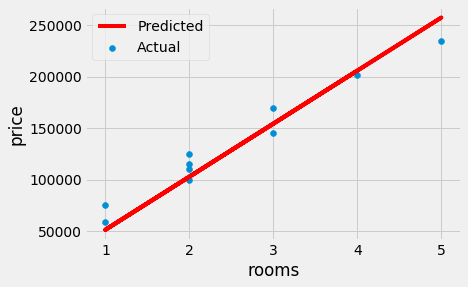

In [20]:
plt.xlabel('rooms'); plt.ylabel('price')
plt.plot(df.rooms, x*w, label='Predicted', color='red')
plt.scatter(df.rooms, y, label='Actual')
plt.legend()

In [21]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [22]:
w = nn.Parameter(tensor([1.]))

fig = plt.figure()
plt.scatter(x, y, c='orange')
line, = plt.plot(x, x*w)
plt.close()

def animate(i):
    update()
    line.set_ydata(x*w)

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=1)

t 29 l 20596193280.00 g -792274.62500 w     1.00
t 29 l 6159115264.00 g 427828.28125 w 79228.46
t 29 l 1949262848.00 g -231027.26562 w 36445.63
t 29 l 721670464.00 g 124754.75000 w 59548.36
t 29 l 363704384.00 g -67367.60156 w 47072.88
t 29 l 259321376.00 g  36378.52344 w 53809.64
t 29 l 228883248.00 g -19644.39258 w 50171.79
t 29 l 220007504.00 g  10607.94922 w 52136.23
t 29 l 217419312.00 g  -5728.26318 w 51075.44
t 29 l 216664624.00 g   3093.28882 w 51648.27
t 29 l 216444544.00 g  -1670.36279 w 51338.94
t 29 l 216380336.00 g    901.98047 w 51505.97
t 29 l 216361696.00 g   -487.09033 w 51415.77
t 29 l 216356192.00 g    263.05908 w 51464.48
t 29 l 216354656.00 g   -142.03613 w 51438.18
t 29 l 216354096.00 g     76.69629 w 51452.38
t 29 l 216354048.00 g    -41.39258 w 51444.71
t 29 l 216354000.00 g     22.37305 w 51448.86
t 29 l 216354000.00 g    -12.09863 w 51446.62
t 29 l 216353952.00 g      6.55078 w 51447.83
t 29 l 216353952.00 g     -3.55469 w 51447.17
t 29 l 216353968.00 g      1

Adding a second attribute: age

In [23]:
df['error'] = df.rooms*float(w)-df.price; df 

,rooms,price,error
0,3,170000.0,-15657.792969
1,2,115000.0,-12105.195312
2,1,75200.0,-23752.597656
3,2,110000.0,-7105.195312
4,2,125000.0,-22105.195312
5,5,235000.0,22237.011719
6,2,99500.0,3394.804688
7,1,59250.0,-7802.597656
8,4,202000.0,3789.609375
9,3,145000.0,9342.207031


In [24]:
df['age'] = [10, 5 , 8, 4, 2, 40, 32, 4, 29, 33]
# df = df.drop(['error'], axis=1)
df

,rooms,price,error,age
0,3,170000.0,-15657.792969,10
1,2,115000.0,-12105.195312,5
2,1,75200.0,-23752.597656,8
3,2,110000.0,-7105.195312,4
4,2,125000.0,-22105.195312,2
5,5,235000.0,22237.011719,40
6,2,99500.0,3394.804688,32
7,1,59250.0,-7802.597656,4
8,4,202000.0,3789.609375,29
9,3,145000.0,9342.207031,33


In [25]:
del x

In [26]:
X = tensor(df[['rooms', 'age']].values).float()
display(X)
y = tensor(df['price']).float()
display(y) 
w = tensor([40_000., -1000.] ).float()
display(w)
y_hat = X@w
display('y_hat', y_hat)
display('y', y)
display('error', abs(y_hat-y))

tensor([[ 3., 10.],
        [ 2.,  5.],
        [ 1.,  8.],
        [ 2.,  4.],
        [ 2.,  2.],
        [ 5., 40.],
        [ 2., 32.],
        [ 1.,  4.],
        [ 4., 29.],
        [ 3., 33.]])

tensor([170000., 115000.,  75200., 110000., 125000., 235000.,  99500.,  59250.,
        202000., 145000.])

tensor([40000., -1000.])

'y_hat'

tensor([110000.,  75000.,  32000.,  76000.,  78000., 160000.,  48000.,  36000.,
        131000.,  87000.])

'y'

tensor([170000., 115000.,  75200., 110000., 125000., 235000.,  99500.,  59250.,
        202000., 145000.])

'error'

tensor([60000., 40000., 43200., 34000., 47000., 75000., 51500., 23250., 71000.,
        58000.])

This is just about training error!

In [27]:
loss = mse(y_hat, y); loss

tensor(2.7654e+09)

In [28]:
w = nn.Parameter(w); w

Parameter containing:
tensor([40000., -1000.], requires_grad=True)

In [29]:
def update():
    y_hat = X@w
    loss = mse(y, y_hat)
    loss.backward()
    with torch.no_grad():
        print(f't {t:2}', f'l {float(loss):10.2f}', end='')
        print(f' g {w.grad}', end='')
        print(f' w {w}')
        #print(f't {t:2}', f'l {float(loss):10.2f} g {float(w.grad):12.5f} w {float(w):8.2f}')
        w.sub_(lr * w.grad)
        w.grad.zero_()

In [30]:
lr = 1e-3
for t in range(150): update()

t  0 l 2765405440.00 g tensor([ -284890., -2017920.]) w Parameter containing:
tensor([40000., -1000.], requires_grad=True)
t  1 l 621308544.00 g tensor([-61356.5703, -58252.9336]) w Parameter containing:
tensor([40284.8906,  1017.9200], requires_grad=True)
t  2 l 616189440.00 g tensor([-54085.4219,   4088.4719]) w Parameter containing:
tensor([40346.2461,  1076.1730], requires_grad=True)
t  3 l 613253952.00 g tensor([-53696.5273,   6054.3467]) w Parameter containing:
tensor([40400.3320,  1072.0845], requires_grad=True)
t  4 l 610338624.00 g tensor([-53527.1055,   6098.9502]) w Parameter containing:
tensor([40454.0273,  1066.0302], requires_grad=True)
t  5 l 607440640.00 g tensor([-53365.1328,   6082.6875]) w Parameter containing:
tensor([40507.5547,  1059.9312], requires_grad=True)
t  6 l 604560256.00 g tensor([-53203.9180,   6064.0518]) w Parameter containing:
tensor([40560.9180,  1053.8485], requires_grad=True)
t  7 l 601697088.00 g tensor([-53043.1406,   6045.9360]) w Parameter cont

t 132 l 351396448.00 g tensor([-36337.3125,   4142.0767]) w Parameter containing:
tensor([46143.0781,   417.5807], requires_grad=True)
t 133 l 350060896.00 g tensor([-36227.5898,   4128.9961]) w Parameter containing:
tensor([46179.4141,   413.4387], requires_grad=True)
t 134 l 348733568.00 g tensor([-36118.1016,   4116.7891]) w Parameter containing:
tensor([46215.6406,   409.3097], requires_grad=True)
t 135 l 347414144.00 g tensor([-36008.9844,   4104.2344]) w Parameter containing:
tensor([46251.7578,   405.1929], requires_grad=True)
t 136 l 346102624.00 g tensor([-35900.1836,   4091.8242]) w Parameter containing:
tensor([46287.7656,   401.0886], requires_grad=True)
t 137 l 344799104.00 g tensor([-35791.7148,   4079.4680]) w Parameter containing:
tensor([46323.6641,   396.9968], requires_grad=True)
t 138 l 343503264.00 g tensor([-35683.5469,   4067.3501]) w Parameter containing:
tensor([46359.4570,   392.9173], requires_grad=True)
t 139 l 342215424.00 g tensor([-35575.7188,   4055.1265

In [31]:
w

Parameter containing:
tensor([46780.6172,   344.9124], requires_grad=True)

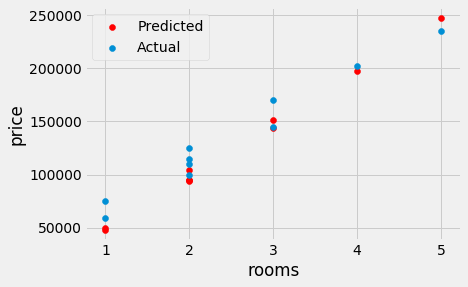

In [32]:
plt.xlabel('rooms'); plt.ylabel('price')
plt.scatter(df.rooms, X@w, label='Predicted', color='red')
plt.scatter(df.rooms, y, label='Actual')
plt.legend()

In [33]:
from mpl_toolkits import mplot3d

In [34]:
X[:,0]
y_hat = X@w; y_hat

tensor([143790.9688,  95285.7969,  49539.9180,  94940.8828,  94251.0625,
        247699.5938, 104598.4297,  48160.2656, 197124.9375, 151723.9531],
       grad_fn=<MvBackward>)

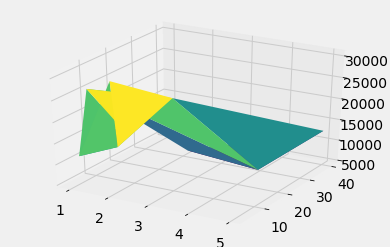

In [35]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(X[:,0], X[:, 1], abs(y-y_hat),
                cmap='viridis', edgecolor='none')

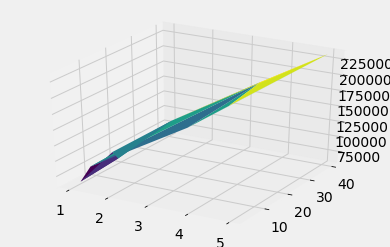

In [36]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(X[:,0], X[:, 1], y,
                cmap='viridis', )

In [37]:
ax.plot_surface??

In [38]:
x

NameError: name 'x' is not defined

In [ ]:
X[:, 0]